# ISM Project (Winter Semester)
# A MACHINE LEARNING APPROACH TO SQL INJECTION PREVENTION

Srinivas Natarajan - 18BCE0048 <br />
Harsh Pandey - 18BCE2307 <br />
Sahaj Adlakha - 18BCE0054 <br />
Kriti Chapagain - 18BCE2483

---

## **Pre-Processing**

### Libraries imported

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import time

In [ ]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score, confusion_matrix

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

### Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = "/content/gdrive/My Drive/ISM_Project/Dataset/"

In [ ]:
df = pd.read_csv(data_path + "sqli.csv",encoding='utf-16')
df.tail()

,Sentence,Label
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0
4199,de]]> </email_address> <find_account_answer...,0


In [ ]:
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [ ]:
transformed_posts = pd.DataFrame(posts)
transformed_posts.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4677,4678,4679,4680,4681,4682,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716
4195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4199,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=pd.concat([df,transformed_posts],axis=1)

In [ ]:
X=df[df.columns[2:]]
y=df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Models**

### **1. Logistic Regression**

In [118]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
log_pred = list(log_reg_model.predict(X_test))

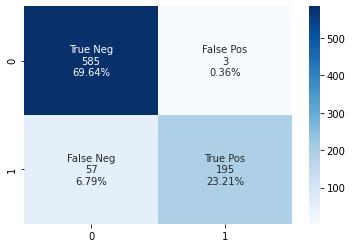

In [124]:
cnf_matrix = confusion_matrix(y_test, log_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [125]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       588
           1       0.98      0.77      0.87       252

    accuracy                           0.93       840
   macro avg       0.95      0.88      0.91       840
weighted avg       0.93      0.93      0.93       840



In [126]:
print("The Metrics for the model are:\n")
print( "Accuracy: ",round(accuracy_score(y_test, log_pred),2) )
print( "F-Score: ",round(f1_score(y_test, log_pred),2) )

The Metrics for the model are:

Accuracy:  0.93
F-Score:  0.87


### **2. Neural Network**

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                94360     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 110,955
Trainable params: 108,907
Non-trainable params: 2,048
____________________________________________

In [ ]:
nn_history = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/10
224/224 [==============================] - 2s 6ms/step - loss: 0.3179 - accuracy: 0.8469 - val_loss: 0.6587 - val_accuracy: 0.7000
Epoch 2/10
224/224 [==============================] - 1s 4ms/step - loss: 0.1143 - accuracy: 0.9576 - val_loss: 0.2235 - val_accuracy: 0.8905
Epoch 3/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0776 - accuracy: 0.9741 - val_loss: 0.0766 - val_accuracy: 0.9798
Epoch 4/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0851 - accuracy: 0.9670 - val_loss: 0.0702 - val_accuracy: 0.9786
Epoch 5/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0878 - accuracy: 0.9719 - val_loss: 0.0570 - val_accuracy: 0.9786
Epoch 6/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9665 - val_loss: 0.1157 - val_accuracy: 0.9286
Epoch 7/10
224/224 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9700 - val_loss: 0.0526 - val_accuracy: 0.9798
Epoch 

In [ ]:
nn_pred = model.predict(X_test)

In [ ]:
for i in range(len(nn_pred)):
    if nn_pred[i]>0.5:
        nn_pred[i]=1
    elif nn_pred[i]<=0.5:
        nn_pred[i]=0

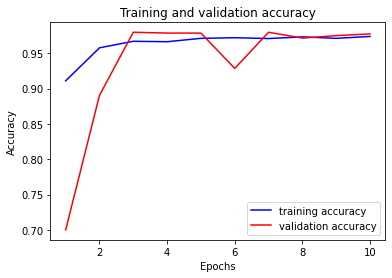

In [ ]:
acc = nn_history.history['accuracy']
val_acc = nn_history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "training accuracy")
plt.plot(epochs, val_acc, 'r', label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.axis([0, 50, 0.65, 1.10])
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       588
           1       0.93      1.00      0.96       252

    accuracy                           0.98       840
   macro avg       0.96      0.98      0.97       840
weighted avg       0.98      0.98      0.98       840



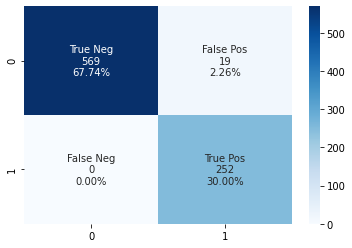

In [ ]:
cnf_matrix = confusion_matrix(y_test, nn_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:
print("The Metrics for the model are:\n")
print( "Accuracy: ",round(accuracy_score(y_test, nn_pred),2) )
print( "F-Score: ",round(f1_score(y_test, nn_pred),2) )

The Metrics for the model are:

Accuracy:  0.98
F-Score:  0.96


### **3. XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(model, param_distributions = params, 
                                   n_iter = param_comb, scoring='roc_auc', n_jobs=4, 
                                   cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=42 )

In [ ]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 13.3min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5de6a1ad0>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [53]:
print('Best estimator: \n',random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations: %d' % (folds, param_comb, (random_search.best_score_ * 2 - 1)))
print('\n Best hyperparameters: ', random_search.best_params_)

Best estimator: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations: 0

 Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8}


In [56]:
best_pred = random_search.best_estimator_
xgb_pred = best_pred.predict_proba(X_test)

In [ ]:
xgb_pred = np.where(xgb_pred > 0.5, 1, 0)
xgb_pred = np.argmax(xgb_pred, axis=1)

In [58]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       588
           1       1.00      0.62      0.76       252

    accuracy                           0.89       840
   macro avg       0.93      0.81      0.84       840
weighted avg       0.90      0.89      0.88       840



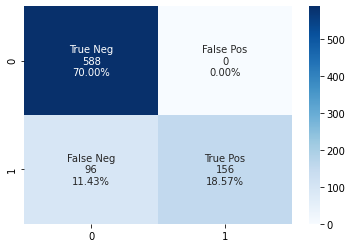

In [59]:
cnf_matrix = confusion_matrix(y_test, xgb_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [60]:
print("The Metrics for the model are:\n")
print( "Accuracy: ",round(accuracy_score(y_test, xgb_pred),2) )
print( "F-Score: ",round(f1_score(y_test, xgb_pred),2) )

The Metrics for the model are:

Accuracy:  0.89
F-Score:  0.76


### **4. Light Boost**

In [61]:
from lightgbm import LGBMClassifier

In [81]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

In [82]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [83]:
model = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

In [85]:
grid = GridSearchCV(model, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)

grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=512,
                                      max_depth=-1, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_estimators=100, n_jobs=3, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,...
             iid='deprecated', n_jobs=2,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.66],
                         'learning_rate': [0.005], 'n_estimators': [40],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
      

In [86]:
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.7392857142857143


In [87]:
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

In [91]:
light_model = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight']
          )

light_model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_bin=512,
               max_depth=-1, min_child_samples=5, min_child_weight=1,
               min_split_gain=0.5, n_estimators=100, n_jobs=3, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=0.7,
               subsample_for_bin=200, subsample_freq=1)

In [92]:
light_pred = light_model.predict(X_test)

In [94]:
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       588
           1       0.97      0.62      0.76       252

    accuracy                           0.88       840
   macro avg       0.91      0.81      0.84       840
weighted avg       0.89      0.88      0.87       840



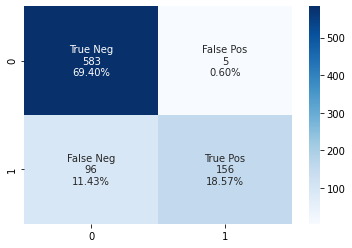

In [95]:
cnf_matrix = confusion_matrix(y_test, light_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [96]:
print("The Metrics for the model are:\n")
print( "Accuracy: ",round(accuracy_score(y_test, light_pred),2) )
print( "F-Score: ",round(f1_score(y_test, light_pred),2) )

The Metrics for the model are:

Accuracy:  0.88
F-Score:  0.76


### **5. CAT Boost**

In [ ]:
!pip install catboost

In [99]:
from catboost import CatBoostClassifier

In [107]:
cat_model = CatBoostClassifier()

In [108]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10,20,30,40,50,60,70,80,90, 100]
            }

In [109]:
Grid_CBC = GridSearchCV(estimator=cat_model, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.6509137	total: 23.3ms	remaining: 2.31s
1:	learn: 0.6179805	total: 39.6ms	remaining: 1.94s
2:	learn: 0.5899033	total: 56.4ms	remaining: 1.82s
3:	learn: 0.5546387	total: 72.1ms	remaining: 1.73s
4:	learn: 0.5338284	total: 87.3ms	remaining: 1.66s
5:	learn: 0.5182953	total: 103ms	remaining: 1.61s
6:	learn: 0.4965720	total: 119ms	remaining: 1.58s
7:	learn: 0.4806051	total: 135ms	remaining: 1.55s
8:	learn: 0.4670935	total: 151ms	remaining: 1.52s
9:	learn: 0.4559804	total: 168ms	remaining: 1.51s
10:	learn: 0.4396002	total: 186ms	remaining: 1.51s
11:	learn: 0.4307226	total: 202ms	remaining: 1.48s
12:	learn: 0.4227927	total: 220ms	remaining: 1.48s
13:	learn: 0.4111634	total: 243ms	remaining: 1.49s
14:	learn: 0.4033381	total: 258ms	remaining: 1.46s
15:	learn: 0.3932448	total: 275ms	remaining: 1.45s
16:	learn: 0.3830984	total: 291ms	remaining: 1.42s
17:	learn: 0.3766140	total: 306ms	remaining: 1.4s
18:	learn: 0.3700695	total: 322ms	remaining: 1.37s
19:	learn: 0.3653580	total: 339ms	rem

GridSearchCV(cv=2, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fe5ccb64f90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)


 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8991071428571429

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 100, 'learning_rate': 0.04}


In [111]:
cat_model = Grid_CBC.best_estimator_
cat_pred = cat_model.predict_proba(X_test)

In [112]:
cat_pred = np.where(cat_pred > 0.5, 1, 0)
cat_pred = np.argmax(cat_pred, axis=1)

In [113]:
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       588
           1       1.00      0.64      0.78       252

    accuracy                           0.89       840
   macro avg       0.93      0.82      0.85       840
weighted avg       0.91      0.89      0.88       840



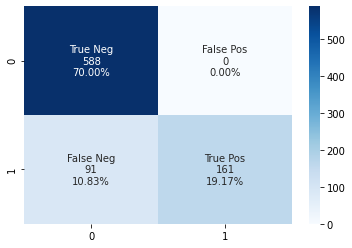

In [114]:
cnf_matrix = confusion_matrix(y_test, cat_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')


In [115]:
print("The Metrics for the model are:\n")
print( "Accuracy: ",round(accuracy_score(y_test, cat_pred),2) )
print( "F-Score: ",round(f1_score(y_test, cat_pred),2) )

The Metrics for the model are:

Accuracy:  0.89
F-Score:  0.78


## **Results**

In [128]:
label_rows = ["Accuracy", "F-Score"]
label_cols = ["Logistic", "Neural Network", "XGBoost", "LightGBM", "CatBoost"]
acc = [round(accuracy_score(y_test, log_pred),2), 
       round(accuracy_score(y_test, nn_pred),2),
       round(accuracy_score(y_test, xgb_pred),2),
       round(accuracy_score(y_test, light_pred),2),
       round(accuracy_score(y_test, cat_pred),2)
       ]

f_scores = [round(f1_score(y_test, log_pred),2), 
            round(f1_score(y_test, nn_pred),2),
            round(f1_score(y_test, xgb_pred),2),
            round(f1_score(y_test, light_pred),2),
            round(f1_score(y_test, cat_pred),2)
            ]

In [135]:
results = pd.DataFrame({"Accuracy": acc, "F-Scores":f_scores}).T
results.columns = label_cols
results.head(5)

,Logistic,Neural Network,XGBoost,LightGBM,CatBoost
Accuracy,0.93,0.98,0.89,0.88,0.89
F-Scores,0.87,0.96,0.76,0.76,0.78
